In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

In [2]:
# no big improvement
# chrom = "chr1"
# start = 73918464
# end = 74967040

# significant improvement
chrom = "chr9"
start = 132390912
end = 133439488

In [3]:
desired_dim = 512

In [4]:
# target
# target = np.load("./matrices/chr1_73787392-75098112_map_tg0_target.npz")["target"]
target = np.load("./matrices/chr9_132259840-133570560_map_tg0_target.npz")["target"]

In [5]:
# V1 prediction
V1_pred = np.load(f'./matrices/{chrom}_{start}-{end}_map_v1_tg0.npz')["prediction"]

In [6]:
padding_width = (desired_dim - V1_pred.shape[0]) // 2

In [7]:
V1_pred = np.pad(V1_pred, pad_width=padding_width, mode='constant', constant_values=0)

In [8]:
# V2 prediction
V2_pred = np.load(f'./matrices/{chrom}_{start}-{end}_map_v2_tg0.npz')["prediction"]

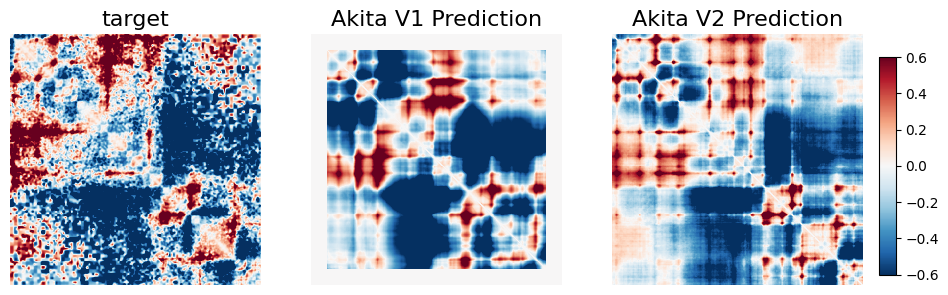

In [10]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(11, 5))

# Plot the first matrix
ax1 = plt.subplot(1, 3, 1)
sns.heatmap(
    target,
    vmin=-0.6,
    vmax=0.6,
    cbar=False,
    cmap="RdBu_r",
    square=True,
    xticklabels=False,
    yticklabels=False,
)

# Plot the second matrix
ax2 = plt.subplot(1, 3, 2)
sns.heatmap(
    V1_pred,
    vmin=-0.6,
    vmax=0.6,
    cbar=False,
    cmap="RdBu_r",
    square=True,
    xticklabels=False,
    yticklabels=False,
)

# Plot the third matrix
ax3 = plt.subplot(1, 3, 3)
sns.heatmap(
    V2_pred,
    vmin=-0.6,
    vmax=0.6,
    cbar=False,
    cmap="RdBu_r",
    square=True,
    xticklabels=False,
    yticklabels=False,
)

for ax, col in zip(axs, ["target", "Akita V1 Prediction", "Akita V2 Prediction"]):
    ax.set_title(col, size=16)

a = np.array([[-0.6,0.6]])
img = plt.imshow(a, cmap="RdBu_r")

cb_ax = fig.add_axes([0.915, 0.265, 0.015, 0.435])
cbar = fig.colorbar(img,orientation='vertical',cax=cb_ax)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(10)

# plt.savefig(f"./plots/{chrom}_{start}-{end}_maps_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
print("done!")

done!
